Importing Necessary Libraries...

In [1]:
import pandas as pd
import numpy as np

Importing Datasets...

In [2]:
df = pd.read_csv('../input/titanic/train.csv')

In [3]:
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- SibSp - sibling spouse - count of spouse and siblings
- Parch - parent child - count of parents and children
- We need to predict whether a passenger has survived or not.

## Missing Data

In [5]:
## Find out how many Nan values are there

In [6]:
df.isnull().head() ## Helps us to find out whether it is true or not


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


- True = has null value.
- False = not has the null value

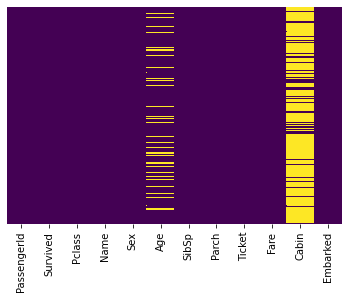

In [7]:
### This is very difficult to see here as how many values are true or false.
## Let's use some visualisation concept.

import seaborn as sns
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = 'viridis');


- This heat map is done to see that whatever condition we are putting(in this case df.isnull() , if it is true then it will be displayed in come other color.)

- y ticklabels is false so i can't see the row numbers(index) , as my x tick labels is not false so i can see all the columns)

- cbar cmap(all the values are shown as yellow color) are just styling technique.

In [8]:
## This also shows me that which column has more number of Nan values.

## Most of the cabin values are missing.And roughly 30-40% of age is missing.

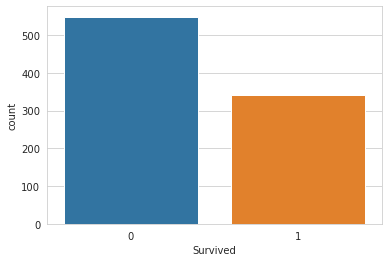

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = df);
## We are making a count plot, and based on survived column we are making count plot.
## 0 is not survived.
## 1 is survived.

So, on the basis of sex(male or female let's check how many survived and how many not survived)...

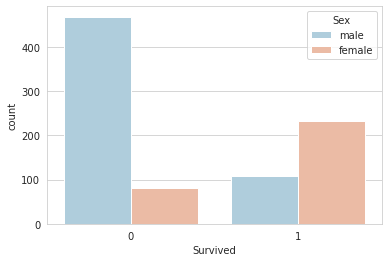

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Sex', data = df , palette = 'RdBu_r');

- Among not survived most of the men died , less women died.
- female survived more.

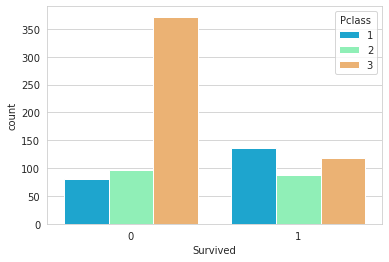

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Pclass', data = df , palette = 'rainbow');

## Pclass - Passenger class , as this has the medium income group people , as they have paid less so they would have been given 
## less preference by the on duty staff.

- Pclass has 1 (rich) , 2 (medium), 3 (poor)
- Hero of titanic was in which class (3)

### Most of the pclass 3 i.e. poor died the most.

In [12]:
import warnings 
warnings.filterwarnings('ignore')

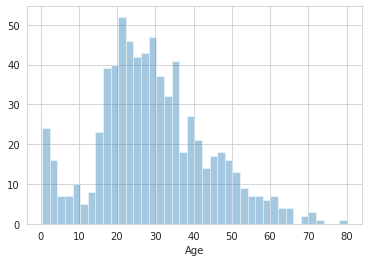

In [13]:
## Let's check what was the distribution for the age of people actually present in the titanic.

sns.distplot(df['Age'].dropna() , kde = False ,  bins = 40);

## As we already know that age has Nan values so we will drop that. For that we are using df['Age'].dropna()

#### So, elderly people were less, youngsters were more , less of old prople.

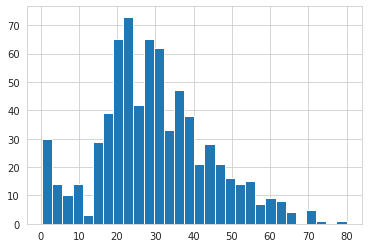

In [14]:
df['Age'].hist(bins = 30 );

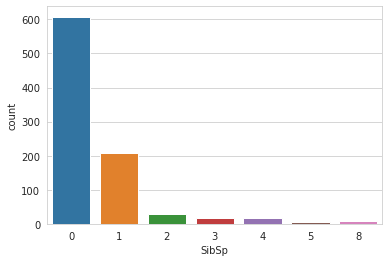

In [15]:
## Similar way let's check for the number of siblings and spouse.
sns.countplot(x = 'SibSp', data=df);

- Most of the people had no sibling or spouse.
- least had 5 (siblings + spouse)
- Most of the people were travelling alone.

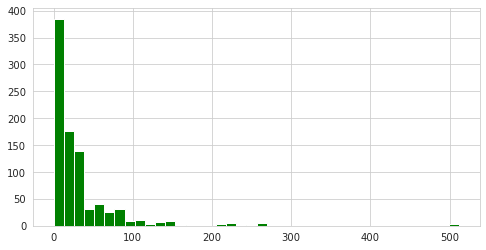

In [16]:
## Let's check what was the average fare of ticket that people bought. 

df['Fare'].hist(color = 'green' , bins = 40 , figsize = (8,4));

## Data Cleaning

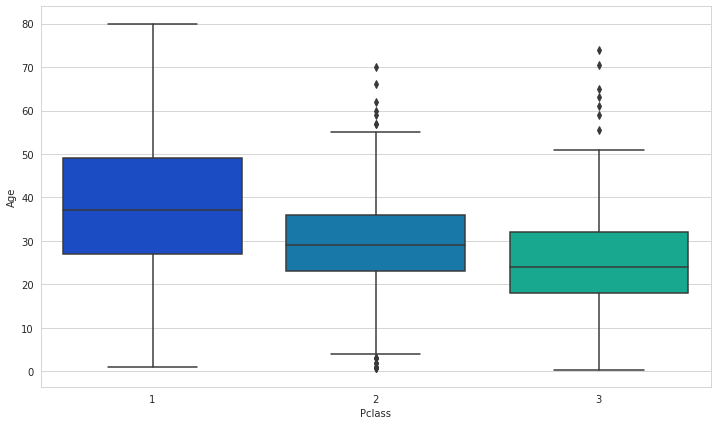

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
sns.boxplot(x= 'Pclass', y='Age', data=df , palette = 'winter');

#### We can see here that which age of people were present and which passenger class they were.
#### 3 passenger class.
#### we found the avg value of each class is 37 or 38, 29, 24.

In [18]:
## let's define a function

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1 :
            return 37
            
        elif Pclass == 2 :
            return 29
        else:
            return 24
        
    else:
        return Age

In [19]:
df["Age"] = df[['Age','Pclass']].apply(impute_age , axis = 1)

## for each and every record in age and Pclas it will be applied.

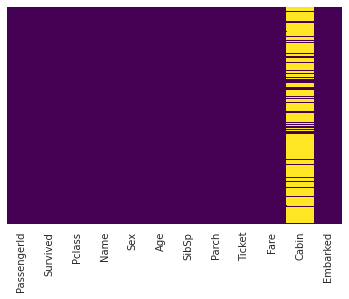

In [20]:
## let's see the heat map that we saw earlier.

import seaborn as sns
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = 'viridis');

#### So, earlier the age column was having null values. But now those are filled.

#### But the problem with the cabin is that there are many null values.
#### So, we need to apply feature engineering.

In [21]:
## But here we can see...
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df.shape

(891, 12)

-  So, out of 891 values, for cabin there are 687 Nan values.
-  We can easily drop this.

In [23]:
## lets drop the Cabin column

df.drop('Cabin' , axis = 1, inplace = True)

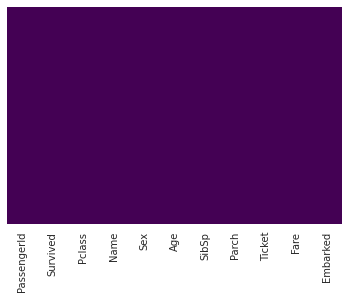

In [24]:
## let's visualize the heatmap.
import seaborn as sns
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = 'viridis');

In [25]:
## Now it is fine so much but still emabarked has some null values. As we can easily see
df.dropna(axis = 0, inplace = True)

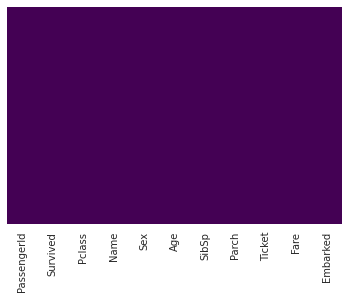

In [26]:
import seaborn as sns
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = 'viridis');

#### Now, Data is clean

## Converting Categorical Data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


- As I have Sex and Embarked object so we can convert them into dummies. (One hot Encoding).

In [28]:
## So in my embarked column I had few 
pd.get_dummies(df['Embarked'], drop_first = True).head()

## here we need to drop the first column other wise it will be redundant.

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [31]:
sex.head()
## As for sex we can say that the person is male or female just with the help of one column only.
## So, to reduce redundancy we are using drop_first as True.

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
## So, as i have created dummies so let's drop the repeated columns and the other columns that are not necessary for me.

df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1 , inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [35]:
df1 = pd.concat([df,sex,embark], axis=1)
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
df1.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [37]:
print(df1.shape)
df1.isnull().sum()

(889, 10)


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [38]:
## Now my data is ready.
## do a train test split and make logistic model.

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X = df1.drop('Survived', axis=1)
y = df1['Survived']
X_train , X_test , y_train , y_test , = train_test_split(X,y,  test_size = 0.30,
                                                        random_state = 123)

In [40]:
X.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.25,1,0,1


In [41]:
X_train.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
591,592,1,52.0,1,0,78.2667,0,0,0


In [42]:
X_test.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
173,174,3,21.0,0,0,7.925,1,0,1


In [43]:
y.head(1)

0    0
Name: Survived, dtype: int64

In [44]:
y_train.head(1)

591    1
Name: Survived, dtype: int64

In [45]:
y_test.head(1)

173    0
Name: Survived, dtype: int64

## Training and Predicting

In [46]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
591,592,1,52.0,1,0,78.2667,0,0,0
417,418,2,18.0,0,2,13.0000,0,0,1
745,746,1,70.0,1,1,71.0000,1,0,1
513,514,1,54.0,1,0,59.4000,0,0,0
456,457,1,65.0,0,0,26.5500,1,0,1


In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [48]:
predictions = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix , accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7902621722846442

In [50]:
C_Matrix = confusion_matrix(y_test, predictions)
C_Matrix

array([[143,  18],
       [ 38,  68]])